In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time

In [2]:
# Get the movielens matrix
movielens = np.zeros((943,1682))
f = open("./ml-100k/u.data", "r")
for i in f.readlines():
    string = i.split()
    movielens[int(string[0])-1][int(string[1])-1] = int(string[2])
f.close()

In [3]:
# Get the no. of entries filled on each column
nz0 = np.count_nonzero(movielens, axis=0)

In [4]:
# Check for and delete the columns that there is only one or even no entry filled
while True:
  allOne = False
  notAllTwo1 = []
  allTwo = True

  # Check for each column
  for j in range(nz0.shape[0]):
    if nz0[j] < 2:
      notAllTwo1.append(j)
      allTwo = False
    
  # Start the division of the uncompleted R if all rows and columns have at least 2 entries filled
  if allTwo == True:
    break

  # Delete the columns that have only one or even no entry filled
  movielens = np.delete(movielens,notAllTwo1,axis=1)

  # Get the number of entries filled on each row and columns
  nz0 = np.count_nonzero(movielens, axis=0)

  # Check whether each of column has only one or even no entry filled 
  for j in range(nz0.shape[0]):
    if nz0[j] < 2:
      allOne = True
    else:
      allOne = False
      break
  
  # Give up to filling the matrix R if each row and column has only one or even no entry filled
  if allOne == True:
    break

# Save the matrix in a csv file
np.savetxt('movielens.csv', movielens, delimiter=',')

In [5]:
# Divide into 2 nearly equally distributed matrices that are mutually exclusive
allOne = False
while allOne == False:
    
  # copy the movielens into movielens2 first
  movielens2 = movielens.copy()
  movielens1 = np.zeros(movielens.shape)

    
  # randomly assign the entries to movielens1 and the corresponding entries in movielens2 are set to 0
  for j in range(movielens.shape[1]):
    i = np.random.choice(movielens[:, j].nonzero()[0], size=int(np.count_nonzero(movielens[:, j])/2), replace=False)
    movielens2[i,j] = 0
    movielens1[i,j] = movielens[i,j]
    
  # get the number of non-missing entries for each column
  nz1 = np.count_nonzero(movielens1, axis=0)
  nz2 = np.count_nonzero(movielens2, axis=0)
    
  # calculate the difference of the numbers of non-zero entries for each column between the 2 matrices
  diff_row = nz2 - nz1
    
  # randomly pick half of the columns whose difference is 1 
  ran = np.random.choice(diff_row.nonzero()[0], size=int(np.count_nonzero(diff_row)/2), replace=False)

  # reassign one of the entries for each of those columns to movielens1 and the corresponding entries in movielens2 are set to 0
  for j in ran:
    if(diff_row[j] == 1):  
      i = np.random.choice(movielens2[:, j].nonzero()[0], size=1, replace=False)
      movielens1[i,j] = movielens2[i,j]
      movielens2[i,j] = 0
    
  allOne = True
    
  # check whether each row and column of both movielens1 and movielens2 has at least one non-missing entries
  for j in range(movielens.shape[1]):
    if(not movielens1[:,j].any()):
      allOne = False
      break
    if(not movielens2[:,j].any()):
      allOne = False
      break
        
# Save the matrices in a csv file 
np.savetxt('movielens1.csv', movielens1, delimiter=',')
np.savetxt('movielens2.csv', movielens2, delimiter=',')

In [11]:
# get the position of non-missing entries in movielens1 and movielens2
X2, Y2 = movielens2.nonzero()
X1, Y1 = movielens1.nonzero()
    
# get the number of non-missing entries in movielens1 and movielens2
nz3 = np.count_nonzero(movielens2)
nz4 = np.count_nonzero(movielens1)
    
# No. of versions of P1
L = 5

# No. of rank
R = 2
    
# Get the mse at the nth iteration
iter_array = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

# Set the learning rate for GD
learning_rate = 0.01

# No. of iterations
T = 500

Set 1

Iteration: 1
MAE of movielens2: 0.4786
MSE of movielens2: 6.2802
MAE of movielens1: 0.4839
MSE of movielens1: 6.3762

Iteration: 2
MAE of movielens2: 0.2166
MSE of movielens2: 1.2084
MAE of movielens1: 0.2143
MSE of movielens1: 1.1884

Iteration: 5
MAE of movielens2: 0.1985
MSE of movielens2: 1.0155
MAE of movielens1: 0.1965
MSE of movielens1: 0.9987

Iteration: 10
MAE of movielens2: 0.1959
MSE of movielens2: 0.9878
MAE of movielens1: 0.1938
MSE of movielens1: 0.9719

Iteration: 20
MAE of movielens2: 0.1929
MSE of movielens2: 0.9644
MAE of movielens1: 0.1913
MSE of movielens1: 0.9504

Iteration: 50
MAE of movielens2: 0.1917
MSE of movielens2: 0.9573
MAE of movielens1: 0.1912
MSE of movielens1: 0.9547

Iteration: 100
MAE of movielens2: 0.1920
MSE of movielens2: 0.9623
MAE of movielens1: 0.1920
MSE of movielens1: 0.9670

Iteration: 200
MAE of movielens2: 0.1926
MSE of movielens2: 0.9741
MAE of movielens1: 0.1928
MSE of movielens1: 0.9813

Iteration: 500
MAE of movielens2: 0.1932
M

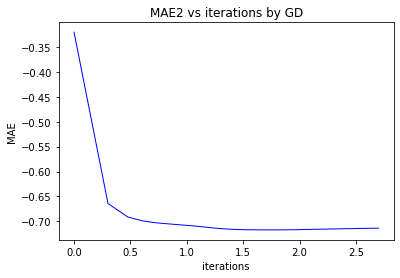

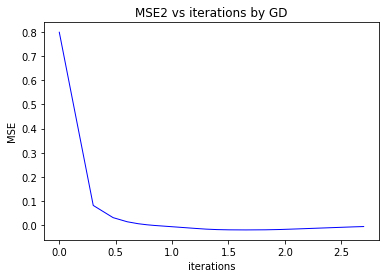

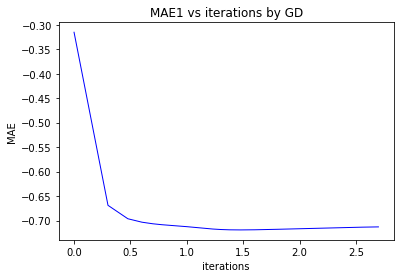

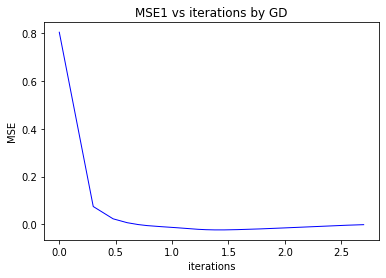

After constraining,
MAE of movielens2: 0.1818
MSE of movielens2: 1.0433
MAE of movielens1: 0.1817
MSE of movielens1: 1.0471

Set 2

Iteration: 1
MAE of movielens2: 0.4828
MSE of movielens2: 6.4023
MAE of movielens1: 0.4862
MSE of movielens1: 6.4534

Iteration: 2
MAE of movielens2: 0.2164
MSE of movielens2: 1.2066
MAE of movielens1: 0.2141
MSE of movielens1: 1.1860

Iteration: 5
MAE of movielens2: 0.1986
MSE of movielens2: 1.0172
MAE of movielens1: 0.1969
MSE of movielens1: 1.0022

Iteration: 10
MAE of movielens2: 0.1974
MSE of movielens2: 1.0011
MAE of movielens1: 0.1957
MSE of movielens1: 0.9872

Iteration: 20
MAE of movielens2: 0.1979
MSE of movielens2: 1.0095
MAE of movielens1: 0.1945
MSE of movielens1: 0.9789

Iteration: 50
MAE of movielens2: 0.1976
MSE of movielens2: 1.0136
MAE of movielens1: 0.1912
MSE of movielens1: 0.9532

Iteration: 100
MAE of movielens2: 0.1947
MSE of movielens2: 0.9919
MAE of movielens1: 0.1916
MSE of movielens1: 0.9606

Iteration: 200
MAE of movielens2: 0.1

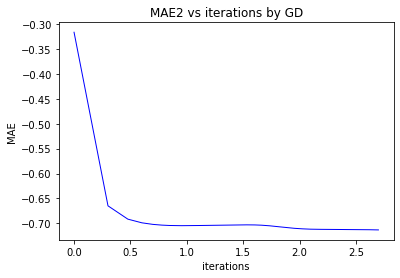

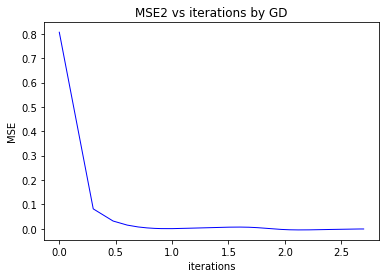

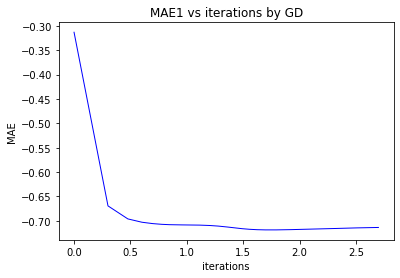

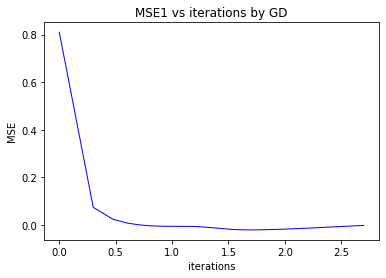

After constraining,
MAE of movielens2: 0.1822
MSE of movielens2: 1.0460
MAE of movielens1: 0.1817
MSE of movielens1: 1.0455

Set 3

Iteration: 1
MAE of movielens2: 0.4846
MSE of movielens2: 6.4665
MAE of movielens1: 0.4885
MSE of movielens1: 6.5349

Iteration: 2
MAE of movielens2: 0.2165
MSE of movielens2: 1.2073
MAE of movielens1: 0.2142
MSE of movielens1: 1.1856

Iteration: 5
MAE of movielens2: 0.1982
MSE of movielens2: 1.0125
MAE of movielens1: 0.1965
MSE of movielens1: 0.9973

Iteration: 10
MAE of movielens2: 0.1952
MSE of movielens2: 0.9807
MAE of movielens1: 0.1934
MSE of movielens1: 0.9648

Iteration: 20
MAE of movielens2: 0.1927
MSE of movielens2: 0.9619
MAE of movielens1: 0.1909
MSE of movielens1: 0.9464

Iteration: 50
MAE of movielens2: 0.1918
MSE of movielens2: 0.9570
MAE of movielens1: 0.1910
MSE of movielens1: 0.9526

Iteration: 100
MAE of movielens2: 0.1921
MSE of movielens2: 0.9631
MAE of movielens1: 0.1917
MSE of movielens1: 0.9632

Iteration: 200
MAE of movielens2: 0.1

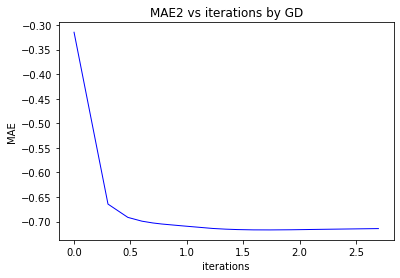

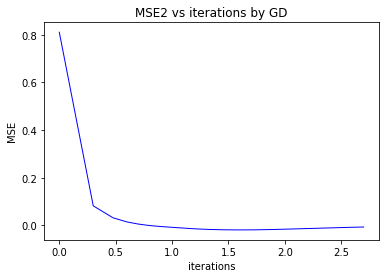

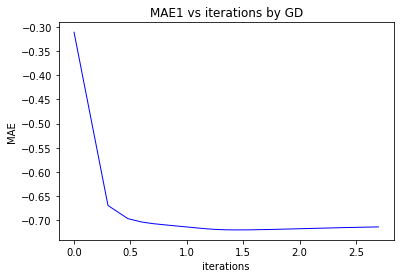

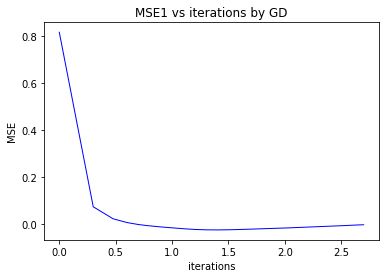

After constraining,
MAE of movielens2: 0.1817
MSE of movielens2: 1.0418
MAE of movielens1: 0.1818
MSE of movielens1: 1.0465

Set 4

Iteration: 1
MAE of movielens2: 0.4835
MSE of movielens2: 6.4581
MAE of movielens1: 0.4860
MSE of movielens1: 6.4914

Iteration: 2
MAE of movielens2: 0.2161
MSE of movielens2: 1.2035
MAE of movielens1: 0.2139
MSE of movielens1: 1.1835

Iteration: 5
MAE of movielens2: 0.1983
MSE of movielens2: 1.0157
MAE of movielens1: 0.1966
MSE of movielens1: 0.9997

Iteration: 10
MAE of movielens2: 0.1960
MSE of movielens2: 0.9909
MAE of movielens1: 0.1945
MSE of movielens1: 0.9773

Iteration: 20
MAE of movielens2: 0.1932
MSE of movielens2: 0.9676
MAE of movielens1: 0.1921
MSE of movielens1: 0.9588

Iteration: 50
MAE of movielens2: 0.1916
MSE of movielens2: 0.9552
MAE of movielens1: 0.1914
MSE of movielens1: 0.9575

Iteration: 100
MAE of movielens2: 0.1918
MSE of movielens2: 0.9618
MAE of movielens1: 0.1922
MSE of movielens1: 0.9690

Iteration: 200
MAE of movielens2: 0.1

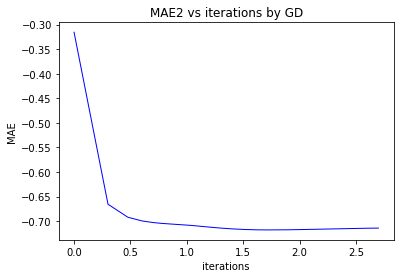

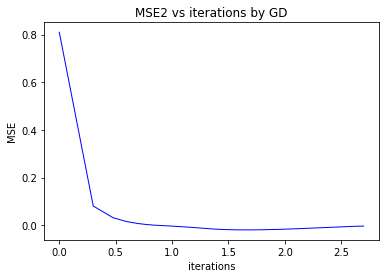

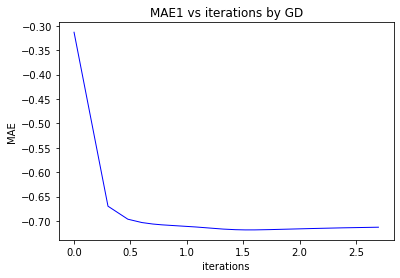

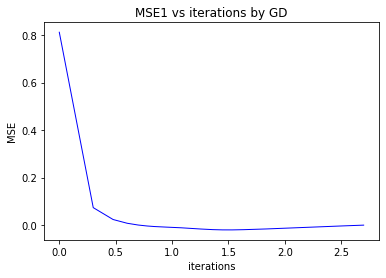

After constraining,
MAE of movielens2: 0.1818
MSE of movielens2: 1.0456
MAE of movielens1: 0.1825
MSE of movielens1: 1.0538

Set 5

Iteration: 1
MAE of movielens2: 0.4844
MSE of movielens2: 6.4609
MAE of movielens1: 0.4867
MSE of movielens1: 6.4888

Iteration: 2
MAE of movielens2: 0.2163
MSE of movielens2: 1.2062
MAE of movielens1: 0.2139
MSE of movielens1: 1.1828

Iteration: 5
MAE of movielens2: 0.1989
MSE of movielens2: 1.0196
MAE of movielens1: 0.1968
MSE of movielens1: 1.0010

Iteration: 10
MAE of movielens2: 0.1979
MSE of movielens2: 1.0059
MAE of movielens1: 0.1957
MSE of movielens1: 0.9865

Iteration: 20
MAE of movielens2: 0.1974
MSE of movielens2: 1.0072
MAE of movielens1: 0.1963
MSE of movielens1: 0.9989

Iteration: 50
MAE of movielens2: 0.1937
MSE of movielens2: 0.9768
MAE of movielens1: 0.1975
MSE of movielens1: 1.0233

Iteration: 100
MAE of movielens2: 0.1925
MSE of movielens2: 0.9665
MAE of movielens1: 0.1953
MSE of movielens1: 1.0035

Iteration: 200
MAE of movielens2: 0.1

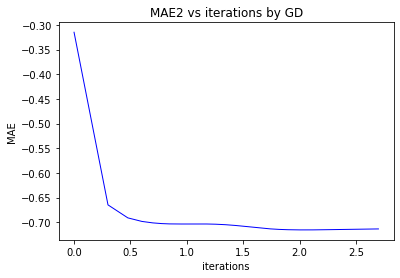

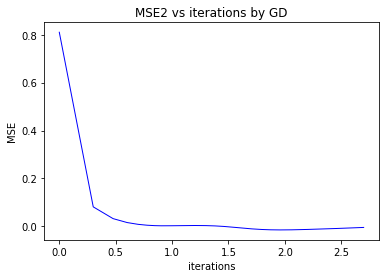

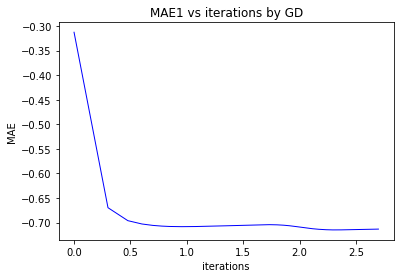

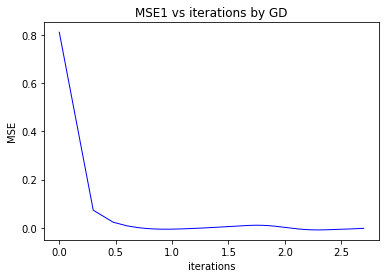

After constraining,
MAE of movielens2: 0.1815
MSE of movielens2: 1.0426
MAE of movielens1: 0.1821
MSE of movielens1: 1.0520



In [12]:
for l in range(L):
    
  print("Set %d" %(l+1))
  print()
    
  # Initialize User and Item Latents and Biases
  temp = np.random.sample((movielens.shape[0],R))
  P1 = np.copy(temp)
  Q1 = np.zeros((movielens.shape[1],R))
  P2 = np.copy(temp)
  Q2 = np.zeros((movielens.shape[1],R))
  n = 0
    
  line_iter = []
  line_mae2 = []
  line_mse2 = []
  line_mae1 = []
  line_mse1 = []
  line_learning_rate = []
    
  # Get the current start time for calculating the total time used
  start = time.time()
    
  # Complete R by using GD
  for t in range(T):
      
    # Do the matrix completion by GD based on the non-missing entries in movielens1 and movielens2
    for i, j in zip(X1,Y1):
      predicted_entry = 0
      for r in range(R):
        predicted_entry += P1[i,r] * Q1[j,r]
      error = movielens1[i,j] - predicted_entry
      # Update User and Item Latents
      for r in range(R):
        t2 = P1[i,r]
        P1[i,r] += learning_rate * (2 * error * Q1[j,r])
        Q1[j,r] += learning_rate * (2 * error * t2)
      
    for i, j in zip(X2,Y2):
      predicted_entry = 0
      for r in range(R):
        predicted_entry += P2[i,r] * Q2[j,r]
      error = movielens2[i,j] - predicted_entry
      # Update User and Item Latents
      for r in range(R):
        t2 = P2[i,r]
        P2[i,r] += learning_rate * (2 * error * Q2[j,r])
        Q2[j,r] += learning_rate * (2 * error * t2)
      
    # calculate the MSE and MAE
    cost1 = 0
    cost2 = 0
    for x, y in zip(X2, Y2):
      predicted_entry = 0
      for r in range(R):
        predicted_entry += P1[x,r] * Q1[y,r]
      cost1 += abs(movielens2[x, y] - predicted_entry)
      cost2 += pow(movielens2[x, y] - predicted_entry,2)
    mae2 = cost1 / nz3 / 4
    mse2 = cost2 / nz3
      
    cost1 = 0
    cost2 = 0
    for x, y in zip(X1, Y1):
      predicted_entry = 0
      for r in range(R):
        predicted_entry += P2[x,r] * Q2[y,r]
      cost1 += abs(movielens1[x, y] - predicted_entry)
      cost2 += pow(movielens1[x, y] - predicted_entry,2)
    mae1 = cost1 / nz4 / 4
    mse1 = cost2 / nz4
    
    # Record the iterations done and the current MSE
    line_iter.append(np.log10(t+1))
    line_mae2.append(np.log10(mae2))
    line_mse2.append(np.log10(mse2))
    line_mae1.append(np.log10(mae1))
    line_mse1.append(np.log10(mse1))
        
    if (t+1) == iter_array[n]:
      print("Iteration: %d" %(t+1))
      print("MAE of movielens2: %.4f" %mae2)
      print("MSE of movielens2: %.4f" %mse2)
      print("MAE of movielens1: %.4f" %mae1)
      print("MSE of movielens1: %.4f" %mse1)
      print()
      n += 1
    
  # Get the current end time for calculating the total time used
  end = time.time()
    
  print("Time used: %f"%(end-start))
  print()
    
  # Update the predicted movielens
  predicted1 = np.zeros(movielens1.shape)
  for i in range(movielens1.shape[0]):
    for j in range(movielens1.shape[1]):
      for r in range(R):
        predicted1[i,j] += P1[i,r] * Q1[j,r]
        
  predicted2 = np.zeros(movielens2.shape)
  for i in range(movielens2.shape[0]):
    for j in range(movielens2.shape[1]):
      for r in range(R):
        predicted2[i,j] += P2[i,r] * Q2[j,r]
        
  # Save the predicted matrices in a csv file 
  np.savetxt('movielens_GD_1_%d_fixed.csv' %(l+1), predicted1, delimiter=',')
  np.savetxt('movielens_GD_2_%d_fixed.csv' %(l+1), predicted2, delimiter=',')
    
  # Do the constraint
  for i in range(predicted1.shape[0]):
    for j in range(predicted1.shape[1]):
      if predicted1[i,j] < 1.5:
        predicted1[i,j] = 1
      elif (predicted1[i,j] >= 1.5 and predicted1[i,j] < 5.5):
        predicted1[i,j] = int(round(predicted1[i,j]))
      else:
        predicted1[i,j] = 5
    
  for i in range(predicted2.shape[0]):
    for j in range(predicted2.shape[1]):
      if predicted2[i,j] < 1.5:
        predicted2[i,j] = 1
      elif (predicted2[i,j] >= 1.5 and predicted2[i,j] < 5.5):
        predicted2[i,j] = int(round(predicted2[i,j]))
      else:
        predicted2[i,j] = 5
    
  plt.plot(line_iter, line_mae2, color='blue', lw='1')
  plt.xlabel('iterations')  
  plt.ylabel('MAE')
  plt.title("MAE2 vs iterations by GD")
  plt.show()
    
  plt.plot(line_iter, line_mse2, color='blue', lw='1')
  plt.xlabel('iterations')  
  plt.ylabel('MSE')
  plt.title("MSE2 vs iterations by GD")
  plt.show()
    
  plt.plot(line_iter, line_mae1, color='blue', lw='1')
  plt.xlabel('iterations')  
  plt.ylabel('MAE')
  plt.title("MAE1 vs iterations by GD")
  plt.show()
    
  plt.plot(line_iter, line_mse1, color='blue', lw='1')
  plt.xlabel('iterations')  
  plt.ylabel('MSE')
  plt.title("MSE1 vs iterations by GD")
  plt.show()
    
  cost1 = 0
  cost2 = 0
  for x, y in zip(X2, Y2):
    cost1 += abs(movielens2[x, y] - predicted1[x, y])
    cost2 += pow(movielens2[x, y] - predicted1[x, y],2)
  mae2 = cost1 / nz3 / 4
  mse2 = cost2 / nz3
      
  cost1 = 0
  cost2 = 0
  for x, y in zip(X1, Y1):
    cost1 += abs(movielens1[x, y] - predicted2[x, y])
    cost2 += pow(movielens1[x, y] - predicted2[x, y],2)
  mae1 = cost1 / nz4 / 4
  mse1 = cost2 / nz4
    
  print("After constraining,")
  print("MAE of movielens2: %.4f" %mae2)  
  print("MSE of movielens2: %.4f" %mse2)
  print("MAE of movielens1: %.4f" %mae1)
  print("MSE of movielens1: %.4f" %mse1)
  print()
    
  np.savetxt('movielens_GD_constraint_1_%d_fixed.csv' %(l+1), predicted1, delimiter=',')
  np.savetxt('movielens_GD_constraint_2_%d_fixed.csv' %(l+1), predicted2, delimiter=',')

In [9]:
# get the position of non-missing entries in movielens1 and movielens2
X2, Y2 = movielens2.nonzero()
X1, Y1 = movielens1.nonzero()
    
# get the number of non-missing entries in movielens1 and movielens2
nz3 = np.count_nonzero(movielens2)
nz4 = np.count_nonzero(movielens1)
    
# No. of versions of P1
L = 5

# No. of rank
R = 2
    
# Get the mse at the nth iteration
iter_array = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

# Set the learning rate for GD
learning_rate = 0.04

# No. of iterations
T = 500

Set 1

Iteration: 1
learning rate: 0.040000
MAE of movielens2: 0.4840
MSE of movielens2: 6.1443
MAE of movielens1: 0.4785
MSE of movielens1: 6.0634

Iteration: 2
learning rate: 0.040000
MAE of movielens2: 0.2343
MSE of movielens2: 1.3957
MAE of movielens1: 0.2307
MSE of movielens1: 1.3496

Iteration: 5
learning rate: 0.040000
MAE of movielens2: 0.2228
MSE of movielens2: 1.2657
MAE of movielens1: 0.2255
MSE of movielens1: 1.3002

Iteration: 10
learning rate: 0.040000
MAE of movielens2: 0.2210
MSE of movielens2: 1.2447
MAE of movielens1: 0.2256
MSE of movielens1: 1.3048

Iteration: 20
learning rate: 0.040000
MAE of movielens2: 0.2211
MSE of movielens2: 1.2491
MAE of movielens1: 0.2245
MSE of movielens1: 1.2929

Iteration: 50
learning rate: 0.040000
MAE of movielens2: 0.2218
MSE of movielens2: 1.2649
MAE of movielens1: 0.2235
MSE of movielens1: 1.2851

Iteration: 100
learning rate: 0.040000
MAE of movielens2: 0.2229
MSE of movielens2: 1.2826
MAE of movielens1: 0.2237
MSE of movielens1: 1.

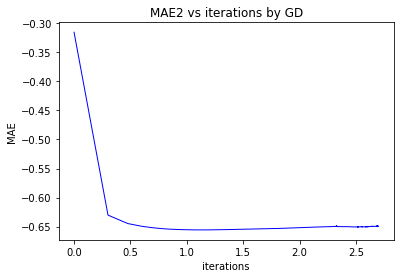

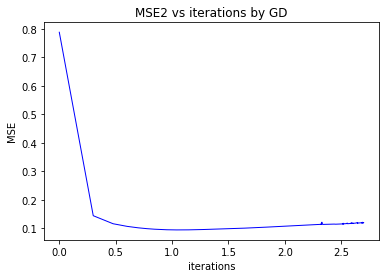

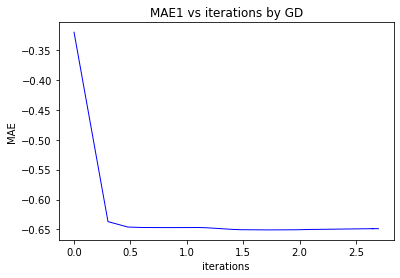

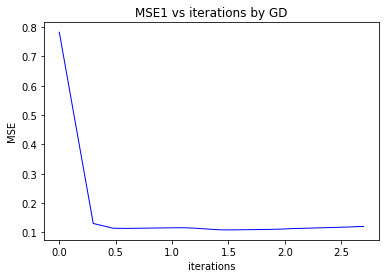

After constraining,
MAE of movielens2: 0.2108
MSE of movielens2: 1.3190
MAE of movielens1: 0.2115
MSE of movielens1: 1.3313

Set 2

Iteration: 1
learning rate: 0.040000
MAE of movielens2: 0.4814
MSE of movielens2: 6.1568
MAE of movielens1: 0.4804
MSE of movielens1: 6.1326

Iteration: 2
learning rate: 0.040000
MAE of movielens2: 0.2353
MSE of movielens2: 1.4072
MAE of movielens1: 0.2316
MSE of movielens1: 1.3593

Iteration: 5
learning rate: 0.040000
MAE of movielens2: 0.2277
MSE of movielens2: 1.3167
MAE of movielens1: 0.2242
MSE of movielens1: 1.2839

Iteration: 10
learning rate: 0.040000
MAE of movielens2: 0.2242
MSE of movielens2: 1.2844
MAE of movielens1: 0.2215
MSE of movielens1: 1.2533

Iteration: 20
learning rate: 0.040000
MAE of movielens2: 0.2228
MSE of movielens2: 1.2692
MAE of movielens1: 0.2216
MSE of movielens1: 1.2563

Iteration: 50
learning rate: 0.040000
MAE of movielens2: 0.2230
MSE of movielens2: 1.2767
MAE of movielens1: 0.2225
MSE of movielens1: 1.2767

Iteration: 10

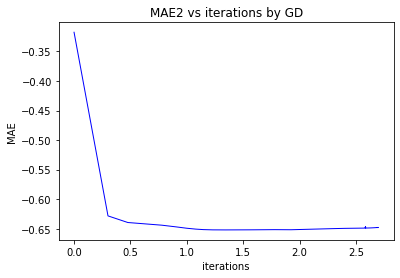

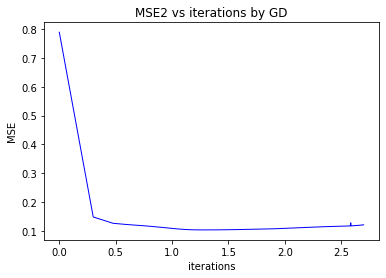

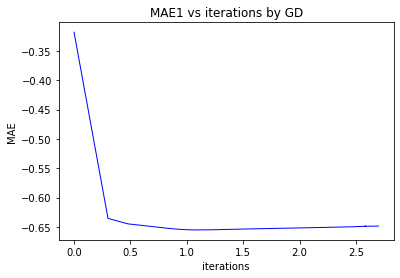

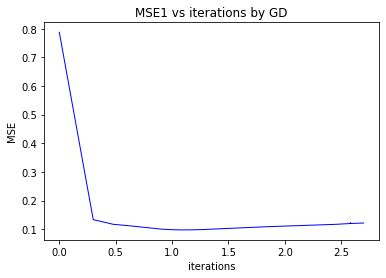

After constraining,
MAE of movielens2: 0.2119
MSE of movielens2: 1.3266
MAE of movielens1: 0.2111
MSE of movielens1: 1.3292

Set 3

Iteration: 1
learning rate: 0.040000
MAE of movielens2: 0.4853
MSE of movielens2: 6.1250
MAE of movielens1: 0.4782
MSE of movielens1: 6.0849

Iteration: 2
learning rate: 0.040000
MAE of movielens2: 0.2344
MSE of movielens2: 1.3959
MAE of movielens1: 0.2310
MSE of movielens1: 1.3526

Iteration: 5
learning rate: 0.040000
MAE of movielens2: 0.2264
MSE of movielens2: 1.3060
MAE of movielens1: 0.2238
MSE of movielens1: 1.2788

Iteration: 10
learning rate: 0.040000
MAE of movielens2: 0.2252
MSE of movielens2: 1.2960
MAE of movielens1: 0.2221
MSE of movielens1: 1.2611

Iteration: 20
learning rate: 0.040000
MAE of movielens2: 0.2238
MSE of movielens2: 1.2839
MAE of movielens1: 0.2223
MSE of movielens1: 1.2659

Iteration: 50
learning rate: 0.040000
MAE of movielens2: 0.2235
MSE of movielens2: 1.2835
MAE of movielens1: 0.2228
MSE of movielens1: 1.2792

Iteration: 10

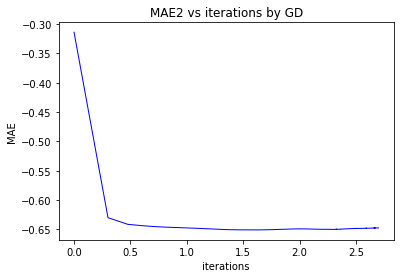

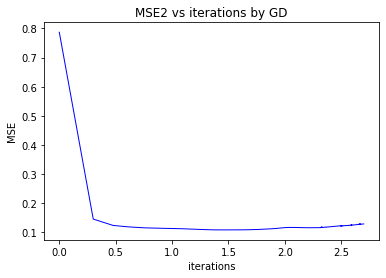

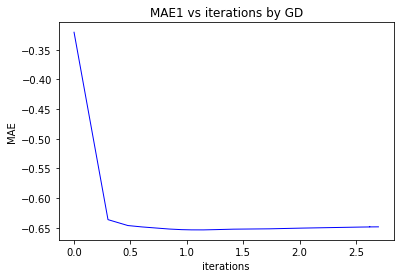

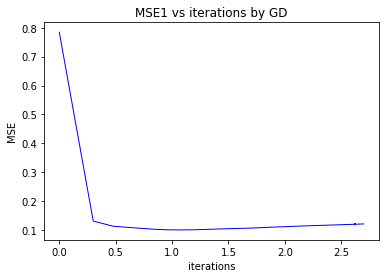

After constraining,
MAE of movielens2: 0.2119
MSE of movielens2: 1.3284
MAE of movielens1: 0.2110
MSE of movielens1: 1.3249

Set 4

Iteration: 1
learning rate: 0.040000
MAE of movielens2: 0.4894
MSE of movielens2: 6.2160
MAE of movielens1: 0.4803
MSE of movielens1: 6.1030

Iteration: 2
learning rate: 0.040000
MAE of movielens2: 0.2344
MSE of movielens2: 1.3953
MAE of movielens1: 0.2314
MSE of movielens1: 1.3580

Iteration: 5
learning rate: 0.040000
MAE of movielens2: 0.2236
MSE of movielens2: 1.2724
MAE of movielens1: 0.2265
MSE of movielens1: 1.3081

Iteration: 10
learning rate: 0.040000
MAE of movielens2: 0.2215
MSE of movielens2: 1.2518
MAE of movielens1: 0.2276
MSE of movielens1: 1.3240

Iteration: 20
learning rate: 0.040000
MAE of movielens2: 0.2214
MSE of movielens2: 1.2518
MAE of movielens1: 0.2259
MSE of movielens1: 1.3105

Iteration: 50
learning rate: 0.040000
MAE of movielens2: 0.2222
MSE of movielens2: 1.2694
MAE of movielens1: 0.2223
MSE of movielens1: 1.2710

Iteration: 10

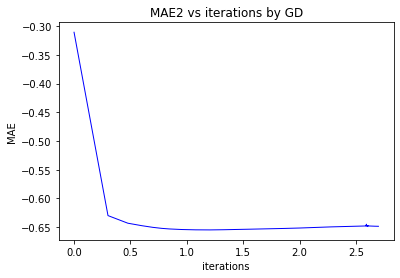

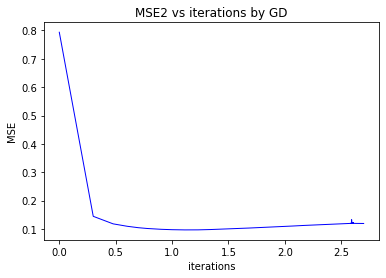

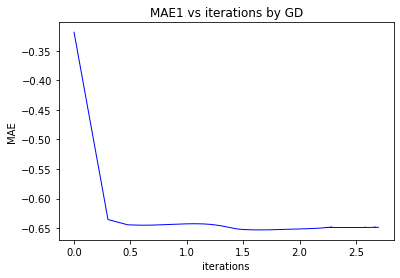

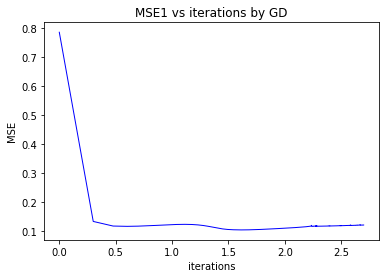

After constraining,
MAE of movielens2: 0.2116
MSE of movielens2: 1.3297
MAE of movielens1: 0.2112
MSE of movielens1: 1.3296

Set 5

Iteration: 1
learning rate: 0.040000
MAE of movielens2: 0.4889
MSE of movielens2: 6.2651
MAE of movielens1: 0.4827
MSE of movielens1: 6.2565

Iteration: 2
learning rate: 0.040000
MAE of movielens2: 0.2340
MSE of movielens2: 1.3936
MAE of movielens1: 0.2297
MSE of movielens1: 1.3387

Iteration: 5
learning rate: 0.040000
MAE of movielens2: 0.2233
MSE of movielens2: 1.2731
MAE of movielens1: 0.2222
MSE of movielens1: 1.2594

Iteration: 10
learning rate: 0.040000
MAE of movielens2: 0.2218
MSE of movielens2: 1.2574
MAE of movielens1: 0.2222
MSE of movielens1: 1.2610

Iteration: 20
learning rate: 0.040000
MAE of movielens2: 0.2219
MSE of movielens2: 1.2599
MAE of movielens1: 0.2227
MSE of movielens1: 1.2706

Iteration: 50
learning rate: 0.040000
MAE of movielens2: 0.2227
MSE of movielens2: 1.2752
MAE of movielens1: 0.2233
MSE of movielens1: 1.2852

Iteration: 10

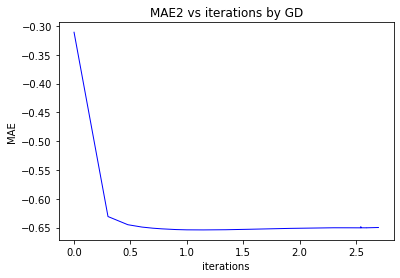

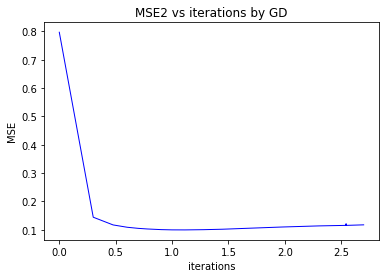

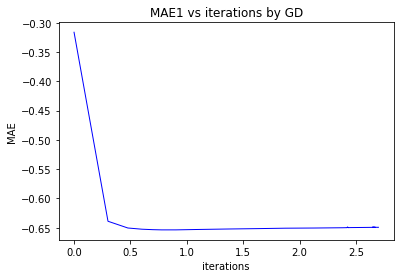

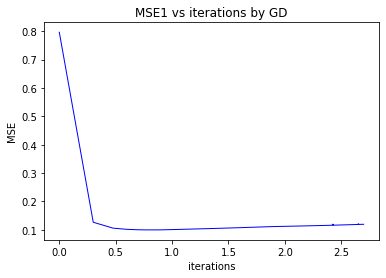

After constraining,
MAE of movielens2: 0.2112
MSE of movielens2: 1.3214
MAE of movielens1: 0.2111
MSE of movielens1: 1.3281



In [10]:
for l in range(L):
    
  print("Set %d" %(l+1))
  print()
    
  # Initialize User and Item Latents and Biases
  temp = np.random.sample((movielens.shape[0],R))
  P1 = np.copy(temp)
  Q1 = np.zeros((movielens.shape[1],R))
  P2 = np.copy(temp)
  Q2 = np.zeros((movielens.shape[1],R))
  n = 0
    
  line_iter = []
  line_mae2 = []
  line_mse2 = []
  line_mae1 = []
  line_mse1 = []
  #line_learning_rate = []
    
  # Get the current start time for calculating the total time used
  start = time.time()
    
  # Complete R by using GD
  for t in range(T):
      
    # Do the matrix completion by GD based on the non-missing entries in movielens1 and movielens2
    for i, j in zip(X1,Y1):
      predicted_entry = 0
      for r in range(R):
        predicted_entry += P1[i,r] * Q1[j,r]
      error = movielens1[i,j] - predicted_entry
      # Update User and Item Latents
      for r in range(R):
        t2 = P1[i,r]
        P1[i,r] += learning_rate * (2 * error * Q1[j,r])
        Q1[j,r] += learning_rate * (2 * error * t2)
      
    for i, j in zip(X2,Y2):
      predicted_entry = 0
      for r in range(R):
        predicted_entry += P2[i,r] * Q2[j,r]
      error = movielens2[i,j] - predicted_entry
      # Update User and Item Latents
      for r in range(R):
        t2 = P2[i,r]
        P2[i,r] += learning_rate * (2 * error * Q2[j,r])
        Q2[j,r] += learning_rate * (2 * error * t2)
      
    # calculate the MSE and MAE
    cost1 = 0
    cost2 = 0
    for x, y in zip(X2, Y2):
      predicted_entry = 0
      for r in range(R):
        predicted_entry += P1[x,r] * Q1[y,r]
      cost1 += abs(movielens2[x, y] - predicted_entry)
      cost2 += pow(movielens2[x, y] - predicted_entry,2)
    mae2 = cost1 / nz3 / 4
    mse2 = cost2 / nz3
      
    cost1 = 0
    cost2 = 0
    for x, y in zip(X1, Y1):
      predicted_entry = 0
      for r in range(R):
        predicted_entry += P2[x,r] * Q2[y,r]
      cost1 += abs(movielens1[x, y] - predicted_entry)
      cost2 += pow(movielens1[x, y] - predicted_entry,2)
    mae1 = cost1 / nz4 / 4
    mse1 = cost2 / nz4
    
    # Record the iterations done and the current MSE
    line_iter.append(np.log10(t+1))
    line_mae2.append(np.log10(mae2))
    line_mse2.append(np.log10(mse2))
    line_mae1.append(np.log10(mae1))
    line_mse1.append(np.log10(mse1))
        
    if (t+1) == iter_array[n]:
      print("Iteration: %d" %(t+1))
      print("learning rate: %f" %learning_rate)
      print("MAE of movielens2: %.4f" %mae2)
      print("MSE of movielens2: %.4f" %mse2)
      print("MAE of movielens1: %.4f" %mae1)
      print("MSE of movielens1: %.4f" %mse1)
      print()
      n += 1
    
  # Get the current end time for calculating the total time used
  end = time.time()
    
  print("Time used: %f"%(end-start))
  print()
    
  # Update the predicted movielens
  predicted1 = np.zeros(movielens1.shape)
  for i in range(movielens1.shape[0]):
    for j in range(movielens1.shape[1]):
      for r in range(R):
        predicted1[i,j] += P1[i,r] * Q1[j,r]
        
  predicted2 = np.zeros(movielens2.shape)
  for i in range(movielens2.shape[0]):
    for j in range(movielens2.shape[1]):
      for r in range(R):
        predicted2[i,j] += P2[i,r] * Q2[j,r]
        
  # Save the predicted matrices in a csv file 
  np.savetxt('movielens_GD_1_%d_fixed.csv' %(l+1), predicted1, delimiter=',')
  np.savetxt('movielens_GD_2_%d_fixed.csv' %(l+1), predicted2, delimiter=',')
    
  # Do the constraint
  for i in range(predicted1.shape[0]):
    for j in range(predicted1.shape[1]):
      if predicted1[i,j] < 1.5:
        predicted1[i,j] = 1
      elif (predicted1[i,j] >= 1.5 and predicted1[i,j] < 5.5):
        predicted1[i,j] = int(round(predicted1[i,j]))
      else:
        predicted1[i,j] = 5
    
  for i in range(predicted2.shape[0]):
    for j in range(predicted2.shape[1]):
      if predicted2[i,j] < 1.5:
        predicted2[i,j] = 1
      elif (predicted2[i,j] >= 1.5 and predicted2[i,j] < 5.5):
        predicted2[i,j] = int(round(predicted2[i,j]))
      else:
        predicted2[i,j] = 5
    
  plt.plot(line_iter, line_mae2, color='blue', lw='1')
  plt.xlabel('iterations')  
  plt.ylabel('MAE')
  plt.title("MAE2 vs iterations by GD")
  plt.show()
    
  plt.plot(line_iter, line_mse2, color='blue', lw='1')
  plt.xlabel('iterations')  
  plt.ylabel('MSE')
  plt.title("MSE2 vs iterations by GD")
  plt.show()
    
  plt.plot(line_iter, line_mae1, color='blue', lw='1')
  plt.xlabel('iterations')  
  plt.ylabel('MAE')
  plt.title("MAE1 vs iterations by GD")
  plt.show()
    
  plt.plot(line_iter, line_mse1, color='blue', lw='1')
  plt.xlabel('iterations')  
  plt.ylabel('MSE')
  plt.title("MSE1 vs iterations by GD")
  plt.show()
    
  cost1 = 0
  cost2 = 0
  for x, y in zip(X2, Y2):
    cost1 += abs(movielens2[x, y] - predicted1[x, y])
    cost2 += pow(movielens2[x, y] - predicted1[x, y],2)
  mae2 = cost1 / nz3 / 4
  mse2 = cost2 / nz3
      
  cost1 = 0
  cost2 = 0
  for x, y in zip(X1, Y1):
    cost1 += abs(movielens1[x, y] - predicted2[x, y])
    cost2 += pow(movielens1[x, y] - predicted2[x, y],2)
  mae1 = cost1 / nz4 / 4
  mse1 = cost2 / nz4
    
  print("After constraining,")
  print("MAE of movielens2: %.4f" %mae2)  
  print("MSE of movielens2: %.4f" %mse2)
  print("MAE of movielens1: %.4f" %mae1)
  print("MSE of movielens1: %.4f" %mse1)
  print()
    
    
  np.savetxt('movielens_GD_constraint_1_%d_fixed.csv' %(l+1), predicted1, delimiter=',')
  np.savetxt('movielens_GD_constraint_2_%d_fixed.csv' %(l+1), predicted2, delimiter=',')

In [7]:
# get the position of non-missing entries in movielens1 and movielens2
X2, Y2 = movielens2.nonzero()
X1, Y1 = movielens1.nonzero()
    
# get the number of non-missing entries in movielens1 and movielens2
nz3 = np.count_nonzero(movielens2)
nz4 = np.count_nonzero(movielens1)
    
# No. of versions of P1
L = 5

# No. of rank
R = 2
    
# Get the mse at the nth iteration
iter_array = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

# Set the learning rate for GD
learning_rate = 0.02

# No. of iterations
T = 500

Set 1

Iteration: 1
learning rate: 0.020000
MAE of movielens2: 0.5877
MSE of movielens2: 9.3166
MAE of movielens1: 0.5815
MSE of movielens1: 9.1419

Iteration: 2
learning rate: 0.020000
MAE of movielens2: 0.2183
MSE of movielens2: 1.2151
MAE of movielens1: 0.2150
MSE of movielens1: 1.1789

Iteration: 5
learning rate: 0.020000
MAE of movielens2: 0.2060
MSE of movielens2: 1.0844
MAE of movielens1: 0.2044
MSE of movielens1: 1.0701

Iteration: 10
learning rate: 0.020000
MAE of movielens2: 0.2026
MSE of movielens2: 1.0549
MAE of movielens1: 0.2010
MSE of movielens1: 1.0394

Iteration: 20
learning rate: 0.020000
MAE of movielens2: 0.2005
MSE of movielens2: 1.0365
MAE of movielens1: 0.2000
MSE of movielens1: 1.0341

Iteration: 50
learning rate: 0.020000
MAE of movielens2: 0.2006
MSE of movielens2: 1.0442
MAE of movielens1: 0.2006
MSE of movielens1: 1.0468

Iteration: 100
learning rate: 0.020000
MAE of movielens2: 0.2012
MSE of movielens2: 1.0543
MAE of movielens1: 0.2013
MSE of movielens1: 1.

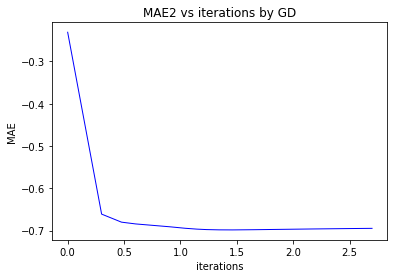

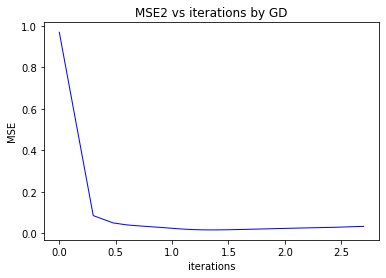

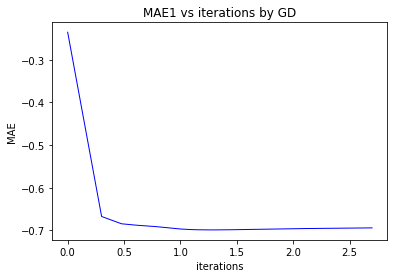

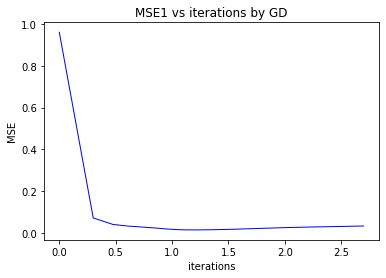

After constraining,
MAE of movielens2: 0.1907
MSE of movielens2: 1.1208
MAE of movielens1: 0.1901
MSE of movielens1: 1.1205

Set 2

Iteration: 1
learning rate: 0.020000
MAE of movielens2: 0.5903
MSE of movielens2: 9.3675
MAE of movielens1: 0.5839
MSE of movielens1: 9.2021

Iteration: 2
learning rate: 0.020000
MAE of movielens2: 0.2186
MSE of movielens2: 1.2190
MAE of movielens1: 0.2151
MSE of movielens1: 1.1797

Iteration: 5
learning rate: 0.020000
MAE of movielens2: 0.2051
MSE of movielens2: 1.0788
MAE of movielens1: 0.2039
MSE of movielens1: 1.0684

Iteration: 10
learning rate: 0.020000
MAE of movielens2: 0.2016
MSE of movielens2: 1.0468
MAE of movielens1: 0.2012
MSE of movielens1: 1.0447

Iteration: 20
learning rate: 0.020000
MAE of movielens2: 0.2006
MSE of movielens2: 1.0389
MAE of movielens1: 0.1998
MSE of movielens1: 1.0344

Iteration: 50
learning rate: 0.020000
MAE of movielens2: 0.2009
MSE of movielens2: 1.0453
MAE of movielens1: 0.2004
MSE of movielens1: 1.0447

Iteration: 10

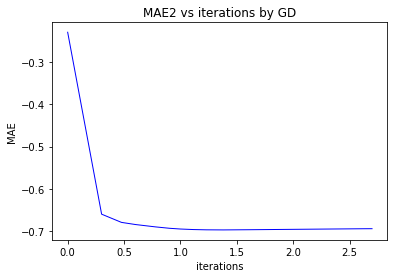

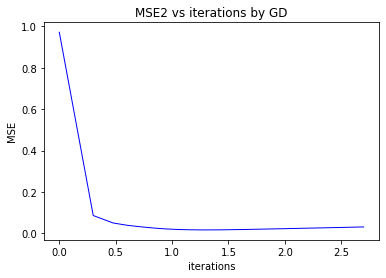

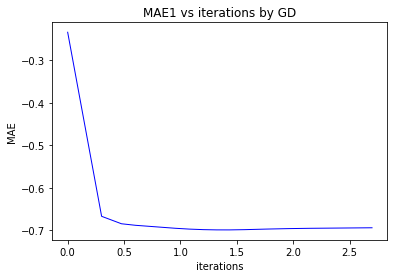

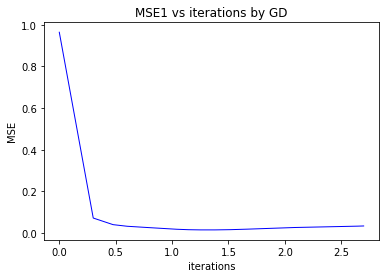

After constraining,
MAE of movielens2: 0.1908
MSE of movielens2: 1.1222
MAE of movielens1: 0.1899
MSE of movielens1: 1.1190

Set 3

Iteration: 1
learning rate: 0.020000
MAE of movielens2: 0.5868
MSE of movielens2: 9.2503
MAE of movielens1: 0.5818
MSE of movielens1: 9.1229

Iteration: 2
learning rate: 0.020000
MAE of movielens2: 0.2187
MSE of movielens2: 1.2199
MAE of movielens1: 0.2151
MSE of movielens1: 1.1802

Iteration: 5
learning rate: 0.020000
MAE of movielens2: 0.2071
MSE of movielens2: 1.1003
MAE of movielens1: 0.2053
MSE of movielens1: 1.0811

Iteration: 10
learning rate: 0.020000
MAE of movielens2: 0.2046
MSE of movielens2: 1.0778
MAE of movielens1: 0.2045
MSE of movielens1: 1.0776

Iteration: 20
learning rate: 0.020000
MAE of movielens2: 0.2015
MSE of movielens2: 1.0477
MAE of movielens1: 0.2029
MSE of movielens1: 1.0641

Iteration: 50
learning rate: 0.020000
MAE of movielens2: 0.2009
MSE of movielens2: 1.0444
MAE of movielens1: 0.2014
MSE of movielens1: 1.0525

Iteration: 10

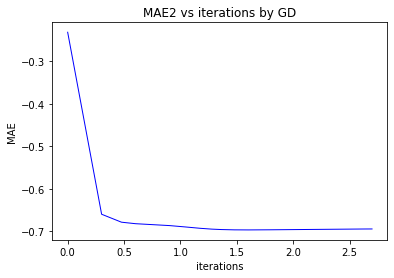

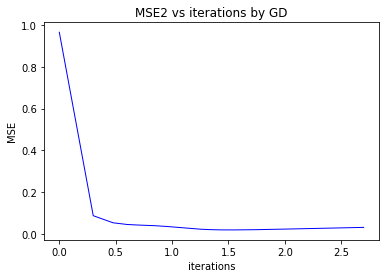

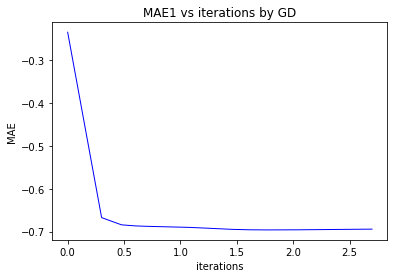

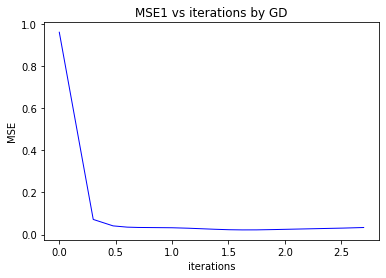

After constraining,
MAE of movielens2: 0.1903
MSE of movielens2: 1.1182
MAE of movielens1: 0.1904
MSE of movielens1: 1.1241

Set 4

Iteration: 1
learning rate: 0.020000
MAE of movielens2: 0.5864
MSE of movielens2: 9.2388
MAE of movielens1: 0.5797
MSE of movielens1: 9.0741

Iteration: 2
learning rate: 0.020000
MAE of movielens2: 0.2188
MSE of movielens2: 1.2200
MAE of movielens1: 0.2150
MSE of movielens1: 1.1778

Iteration: 5
learning rate: 0.020000
MAE of movielens2: 0.2054
MSE of movielens2: 1.0818
MAE of movielens1: 0.2021
MSE of movielens1: 1.0492

Iteration: 10
learning rate: 0.020000
MAE of movielens2: 0.2018
MSE of movielens2: 1.0493
MAE of movielens1: 0.1993
MSE of movielens1: 1.0240

Iteration: 20
learning rate: 0.020000
MAE of movielens2: 0.2003
MSE of movielens2: 1.0356
MAE of movielens1: 0.1993
MSE of movielens1: 1.0269

Iteration: 50
learning rate: 0.020000
MAE of movielens2: 0.2005
MSE of movielens2: 1.0401
MAE of movielens1: 0.2004
MSE of movielens1: 1.0452

Iteration: 10

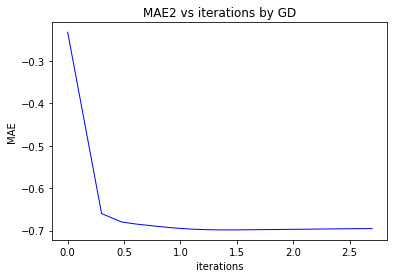

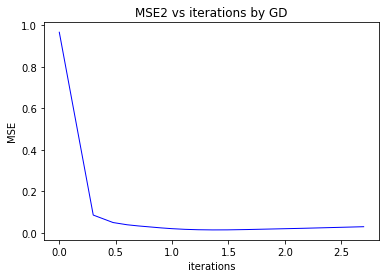

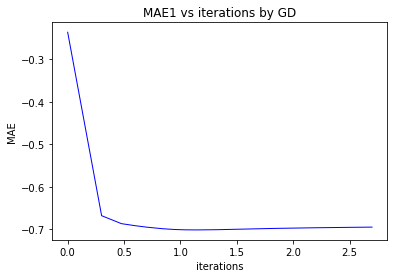

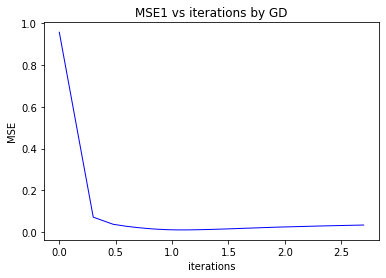

After constraining,
MAE of movielens2: 0.1903
MSE of movielens2: 1.1178
MAE of movielens1: 0.1899
MSE of movielens1: 1.1194

Set 5

Iteration: 1
learning rate: 0.020000
MAE of movielens2: 0.5881
MSE of movielens2: 9.2976
MAE of movielens1: 0.5817
MSE of movielens1: 9.1391

Iteration: 2
learning rate: 0.020000
MAE of movielens2: 0.2184
MSE of movielens2: 1.2171
MAE of movielens1: 0.2149
MSE of movielens1: 1.1779

Iteration: 5
learning rate: 0.020000
MAE of movielens2: 0.2060
MSE of movielens2: 1.0886
MAE of movielens1: 0.2048
MSE of movielens1: 1.0760

Iteration: 10
learning rate: 0.020000
MAE of movielens2: 0.2032
MSE of movielens2: 1.0616
MAE of movielens1: 0.2050
MSE of movielens1: 1.0823

Iteration: 20
learning rate: 0.020000
MAE of movielens2: 0.2013
MSE of movielens2: 1.0453
MAE of movielens1: 0.2057
MSE of movielens1: 1.0960

Iteration: 50
learning rate: 0.020000
MAE of movielens2: 0.2011
MSE of movielens2: 1.0468
MAE of movielens1: 0.2051
MSE of movielens1: 1.0979

Iteration: 10

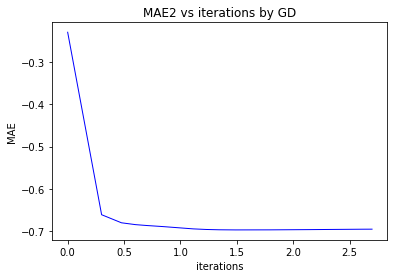

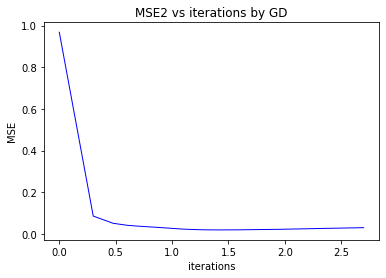

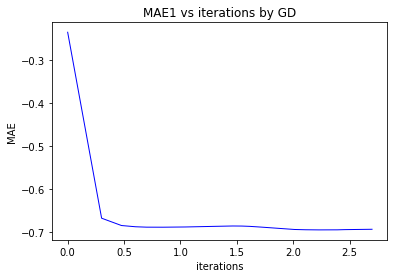

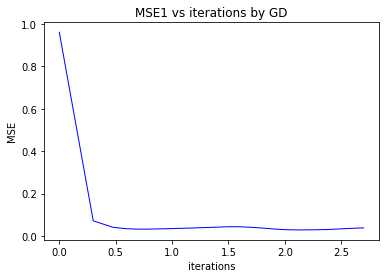

After constraining,
MAE of movielens2: 0.1908
MSE of movielens2: 1.1208
MAE of movielens1: 0.1903
MSE of movielens1: 1.1234



In [8]:
for l in range(L):
    
  print("Set %d" %(l+1))
  print()
    
  # Initialize User and Item Latents and Biases
  temp = np.random.sample((movielens.shape[0],R))
  P1 = np.copy(temp)
  Q1 = np.zeros((movielens.shape[1],R))
  P2 = np.copy(temp)
  Q2 = np.zeros((movielens.shape[1],R))
  n = 0
    
  line_iter = []
  line_mae2 = []
  line_mse2 = []
  line_mae1 = []
  line_mse1 = []
  #line_learning_rate = []
    
  # Get the current start time for calculating the total time used
  start = time.time()
    
  # Complete R by using GD
  for t in range(T):
      
    # Do the matrix completion by GD based on the non-missing entries in movielens1 and movielens2
    for i, j in zip(X1,Y1):
      predicted_entry = 0
      for r in range(R):
        predicted_entry += P1[i,r] * Q1[j,r]
      error = movielens1[i,j] - predicted_entry
      # Update User and Item Latents
      for r in range(R):
        t2 = P1[i,r]
        P1[i,r] += learning_rate * (2 * error * Q1[j,r])
        Q1[j,r] += learning_rate * (2 * error * t2)
      
    for i, j in zip(X2,Y2):
      predicted_entry = 0
      for r in range(R):
        predicted_entry += P2[i,r] * Q2[j,r]
      error = movielens2[i,j] - predicted_entry
      # Update User and Item Latents
      for r in range(R):
        t2 = P2[i,r]
        P2[i,r] += learning_rate * (2 * error * Q2[j,r])
        Q2[j,r] += learning_rate * (2 * error * t2)
      
    # calculate the MSE and MAE
    cost1 = 0
    cost2 = 0
    for x, y in zip(X2, Y2):
      predicted_entry = 0
      for r in range(R):
        predicted_entry += P1[x,r] * Q1[y,r]
      cost1 += abs(movielens2[x, y] - predicted_entry)
      cost2 += pow(movielens2[x, y] - predicted_entry,2)
    mae2 = cost1 / nz3 / 4
    mse2 = cost2 / nz3
      
    cost1 = 0
    cost2 = 0
    for x, y in zip(X1, Y1):
      predicted_entry = 0
      for r in range(R):
        predicted_entry += P2[x,r] * Q2[y,r]
      cost1 += abs(movielens1[x, y] - predicted_entry)
      cost2 += pow(movielens1[x, y] - predicted_entry,2)
    mae1 = cost1 / nz4 / 4
    mse1 = cost2 / nz4
    
    # Record the iterations done and the current MSE
    line_iter.append(np.log10(t+1))
    line_mae2.append(np.log10(mae2))
    line_mse2.append(np.log10(mse2))
    line_mae1.append(np.log10(mae1))
    line_mse1.append(np.log10(mse1))
        
    if (t+1) == iter_array[n]:
      print("Iteration: %d" %(t+1))
      print("learning rate: %f" %learning_rate)
      print("MAE of movielens2: %.4f" %mae2)
      print("MSE of movielens2: %.4f" %mse2)
      print("MAE of movielens1: %.4f" %mae1)
      print("MSE of movielens1: %.4f" %mse1)
      print()
      n += 1
    
  # Get the current end time for calculating the total time used
  end = time.time()
    
  print("Time used: %f"%(end-start))
  print()
    
  # Update the predicted movielens
  predicted1 = np.zeros(movielens1.shape)
  for i in range(movielens1.shape[0]):
    for j in range(movielens1.shape[1]):
      for r in range(R):
        predicted1[i,j] += P1[i,r] * Q1[j,r]
        
  predicted2 = np.zeros(movielens2.shape)
  for i in range(movielens2.shape[0]):
    for j in range(movielens2.shape[1]):
      for r in range(R):
        predicted2[i,j] += P2[i,r] * Q2[j,r]
        
  # Save the predicted matrices in a csv file 
  np.savetxt('movielens_GD_1_%d_fixed.csv' %(l+1), predicted1, delimiter=',')
  np.savetxt('movielens_GD_2_%d_fixed.csv' %(l+1), predicted2, delimiter=',')
    
  # Do the constraint
  for i in range(predicted1.shape[0]):
    for j in range(predicted1.shape[1]):
      if predicted1[i,j] < 1.5:
        predicted1[i,j] = 1
      elif (predicted1[i,j] >= 1.5 and predicted1[i,j] < 5.5):
        predicted1[i,j] = int(round(predicted1[i,j]))
      else:
        predicted1[i,j] = 5
    
  for i in range(predicted2.shape[0]):
    for j in range(predicted2.shape[1]):
      if predicted2[i,j] < 1.5:
        predicted2[i,j] = 1
      elif (predicted2[i,j] >= 1.5 and predicted2[i,j] < 5.5):
        predicted2[i,j] = int(round(predicted2[i,j]))
      else:
        predicted2[i,j] = 5
    
  plt.plot(line_iter, line_mae2, color='blue', lw='1')
  plt.xlabel('iterations')  
  plt.ylabel('MAE')
  plt.title("MAE2 vs iterations by GD")
  plt.show()
    
  plt.plot(line_iter, line_mse2, color='blue', lw='1')
  plt.xlabel('iterations')  
  plt.ylabel('MSE')
  plt.title("MSE2 vs iterations by GD")
  plt.show()
    
  plt.plot(line_iter, line_mae1, color='blue', lw='1')
  plt.xlabel('iterations')  
  plt.ylabel('MAE')
  plt.title("MAE1 vs iterations by GD")
  plt.show()
    
  plt.plot(line_iter, line_mse1, color='blue', lw='1')
  plt.xlabel('iterations')  
  plt.ylabel('MSE')
  plt.title("MSE1 vs iterations by GD")
  plt.show()
    
  cost1 = 0
  cost2 = 0
  for x, y in zip(X2, Y2):
    cost1 += abs(movielens2[x, y] - predicted1[x, y])
    cost2 += pow(movielens2[x, y] - predicted1[x, y],2)
  mae2 = cost1 / nz3 / 4
  mse2 = cost2 / nz3
      
  cost1 = 0
  cost2 = 0
  for x, y in zip(X1, Y1):
    cost1 += abs(movielens1[x, y] - predicted2[x, y])
    cost2 += pow(movielens1[x, y] - predicted2[x, y],2)
  mae1 = cost1 / nz4 / 4
  mse1 = cost2 / nz4
    
  print("After constraining,")
  print("MAE of movielens2: %.4f" %mae2)  
  print("MSE of movielens2: %.4f" %mse2)
  print("MAE of movielens1: %.4f" %mae1)
  print("MSE of movielens1: %.4f" %mse1)
  print()
    
    
  np.savetxt('movielens_GD_constraint_1_%d_fixed.csv' %(l+1), predicted1, delimiter=',')
  np.savetxt('movielens_GD_constraint_2_%d_fixed.csv' %(l+1), predicted2, delimiter=',')